In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Dataset01-Employee_Attrition.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


check duplicate

In [8]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print(len(df))

False    11991
True      3008
Name: count, dtype: int64
11991


Target varible

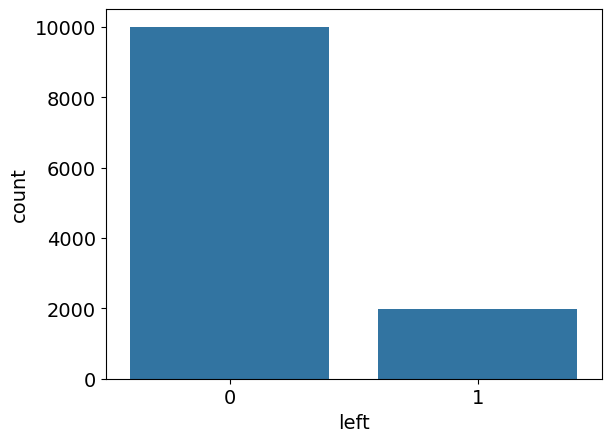

In [9]:
plt.rc('font',size=14)
sns.countplot(x='left',data=df)
plt.show()

Exploratory Data Analysis

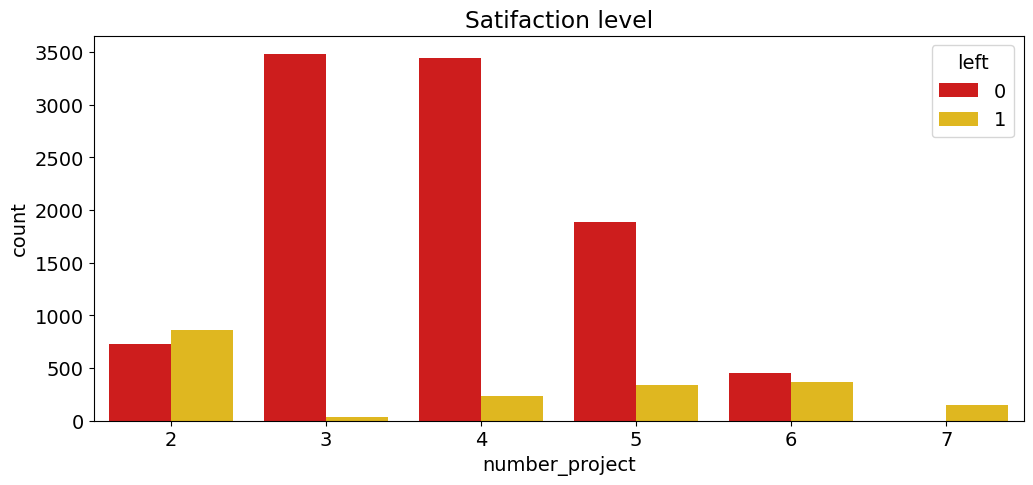

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(x='number_project',hue='left',data=df,palette='hot')
plt.title('Satifaction level')
plt.show()


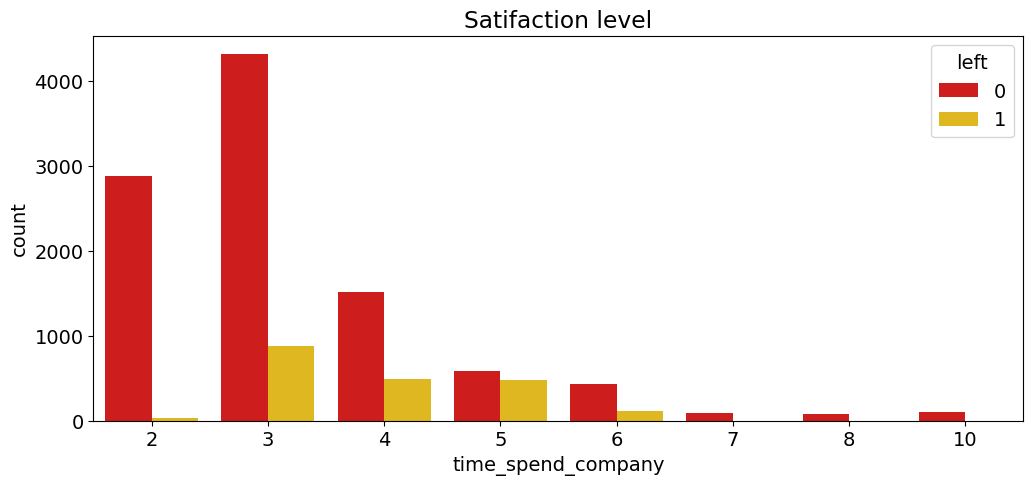

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x='time_spend_company',hue='left',data=df,palette='hot')
plt.title('Satifaction level')
plt.show()


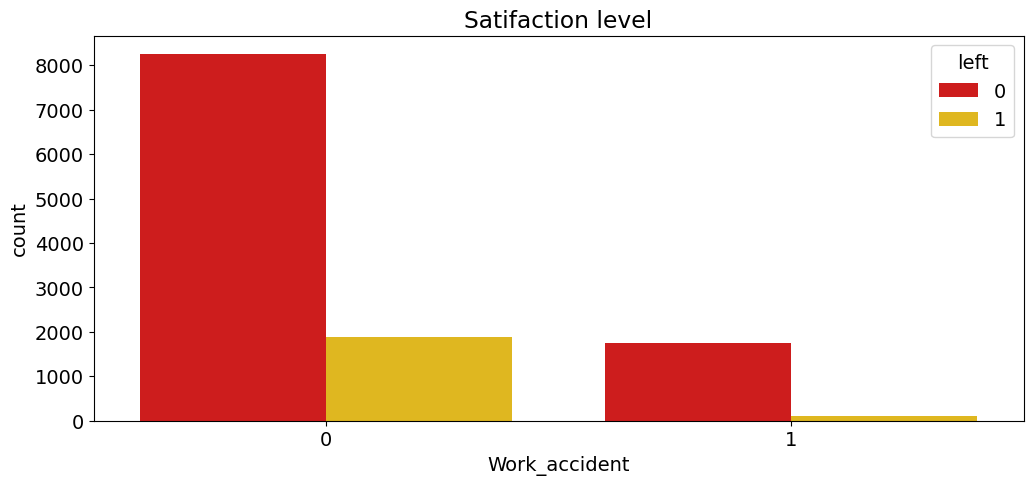

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x='Work_accident',hue='left',data=df,palette='hot')
plt.title('Satifaction level')
plt.show()


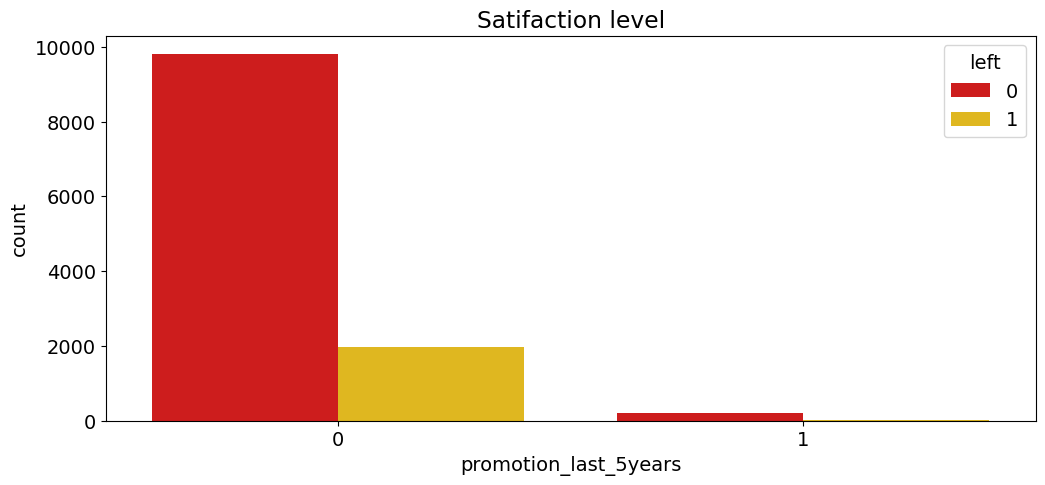

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='promotion_last_5years',hue='left',data=df,palette='hot')
plt.title('Satifaction level')
plt.show()


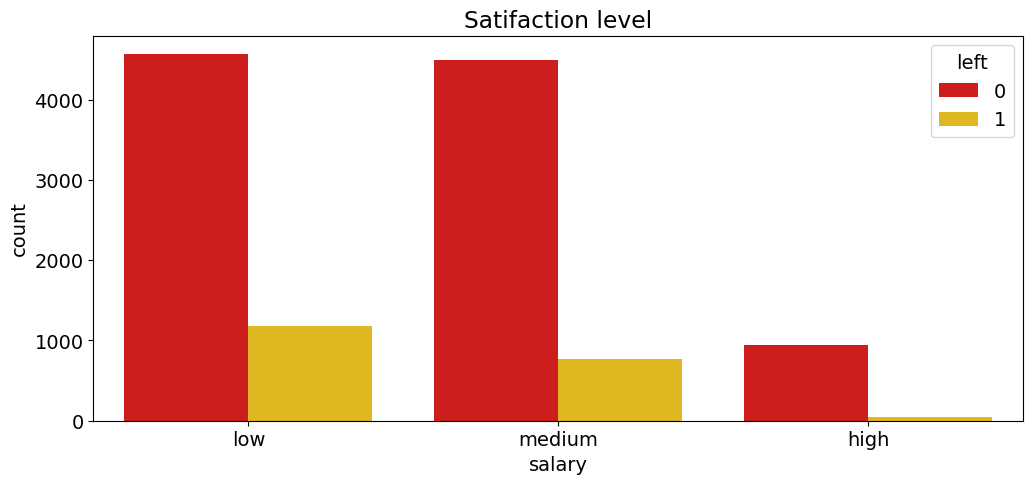

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='salary',hue='left',data=df,palette='hot')
plt.title('Satifaction level')
plt.show()


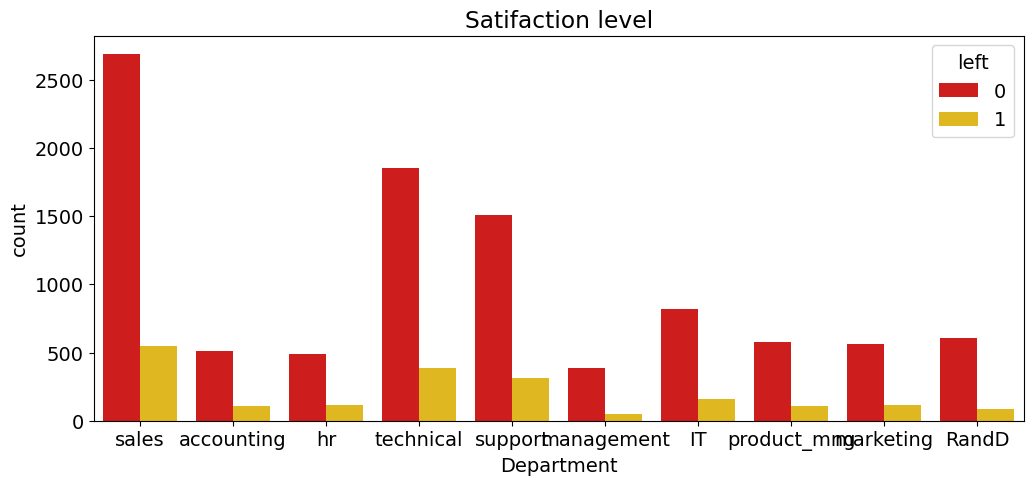

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='left',data=df,palette='hot')
plt.title('Satifaction level')
plt.show()


In [16]:
num_col=df.select_dtypes(['float64','int64'])
cat_col=df.select_dtypes('object')

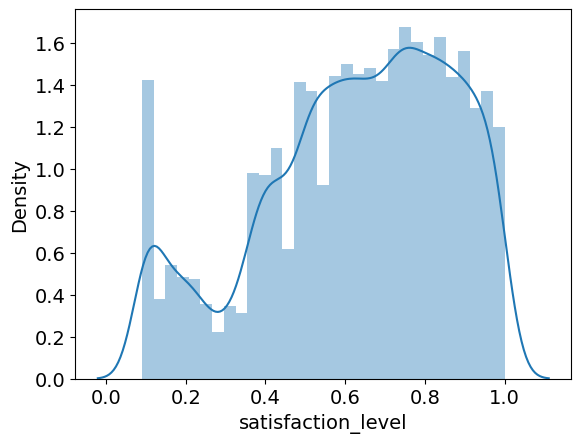

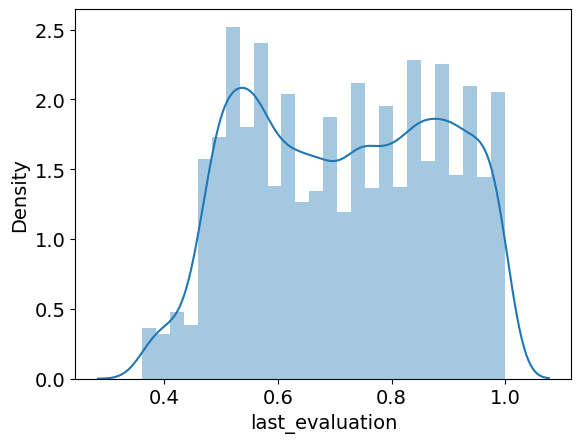

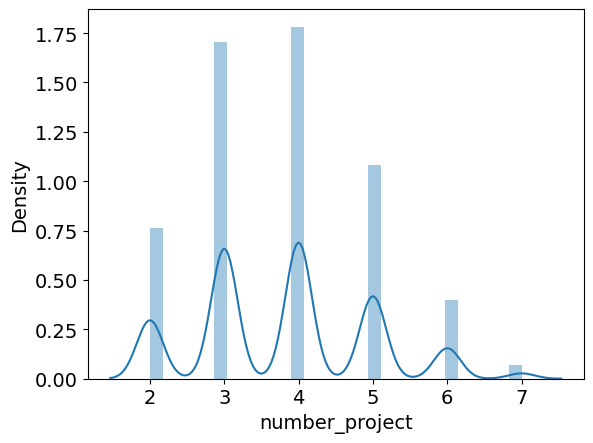

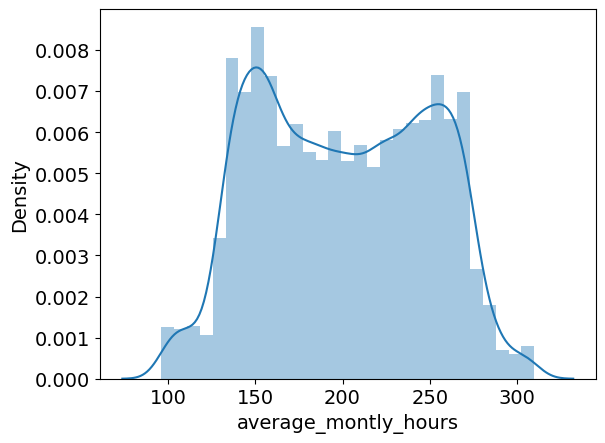

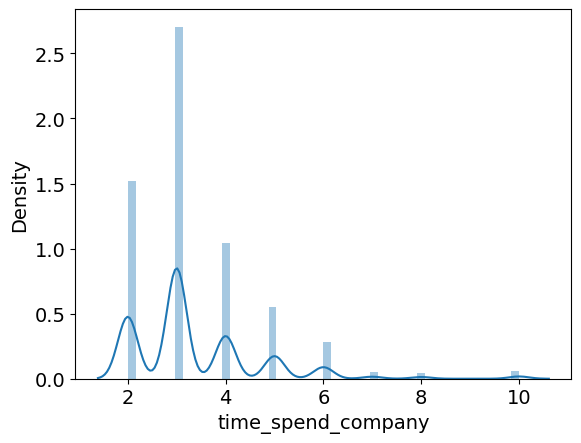

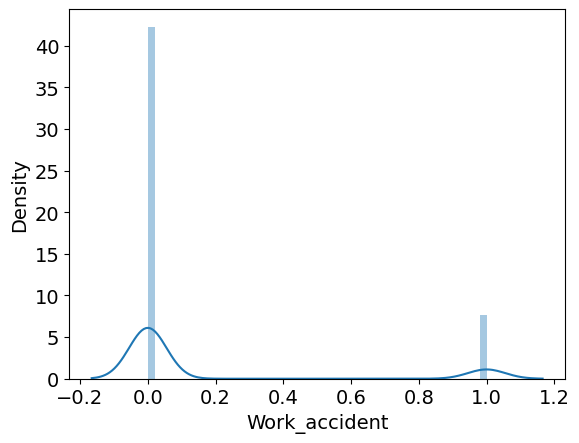

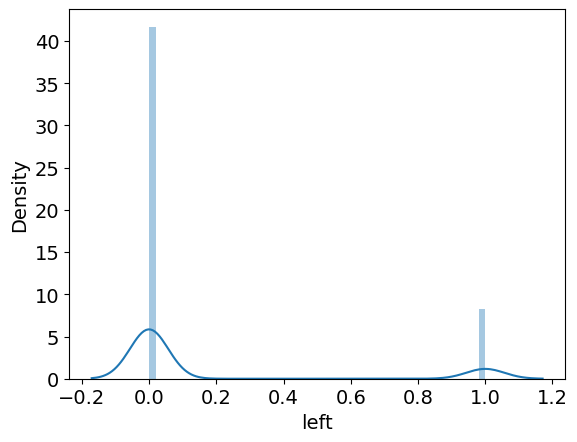

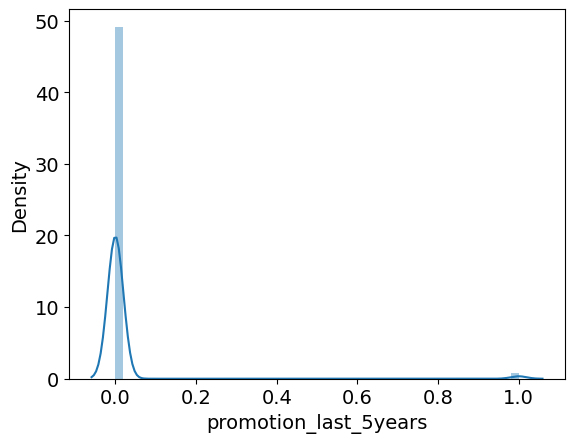

In [17]:
for col in num_col:
  sns.distplot(df[col])
  plt.show()

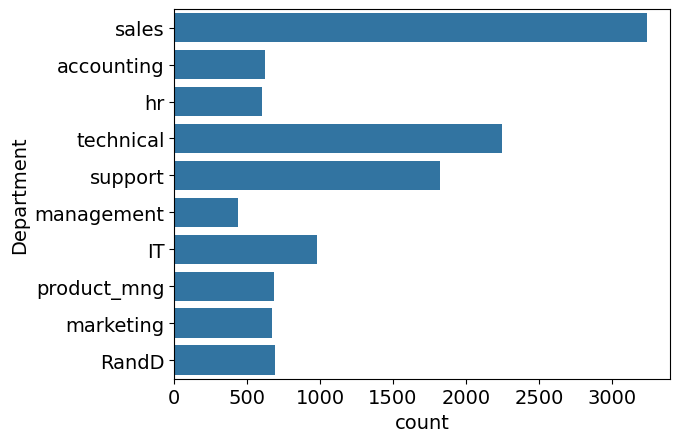

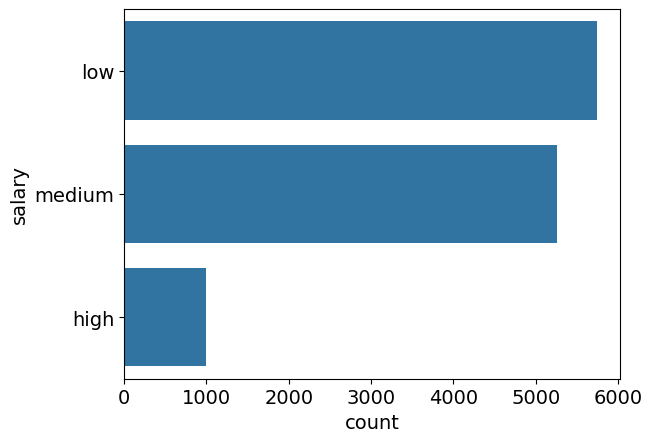

In [18]:
for col in cat_col:
  sns.countplot(df[col])
  plt.show()

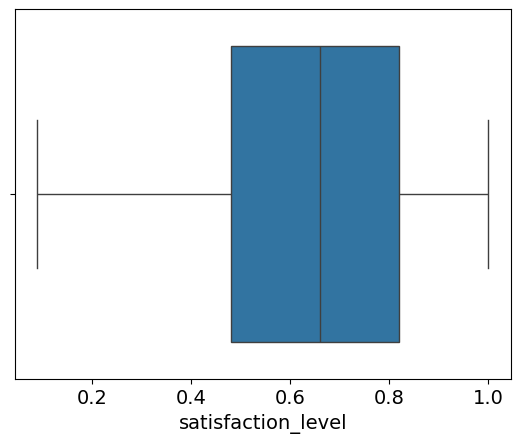

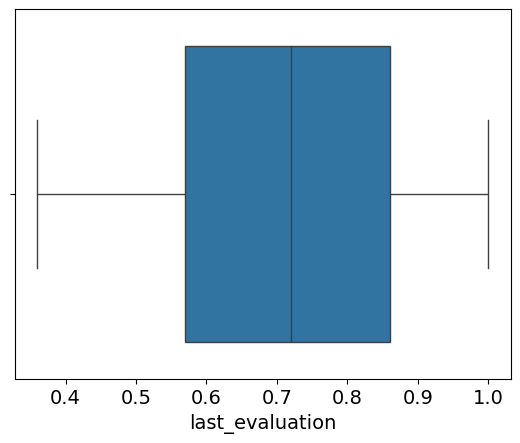

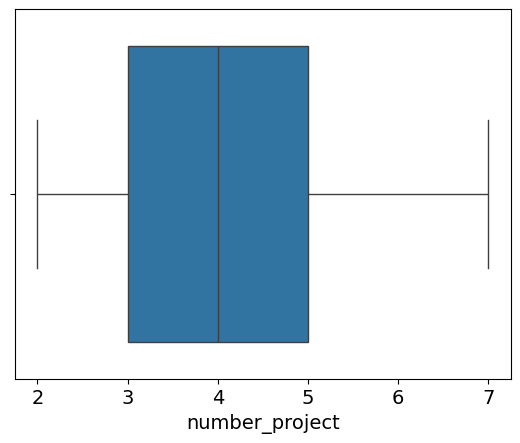

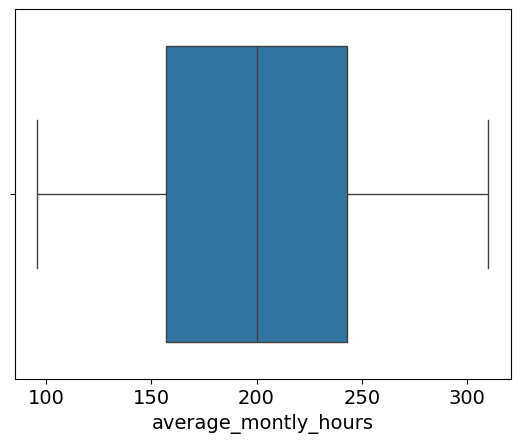

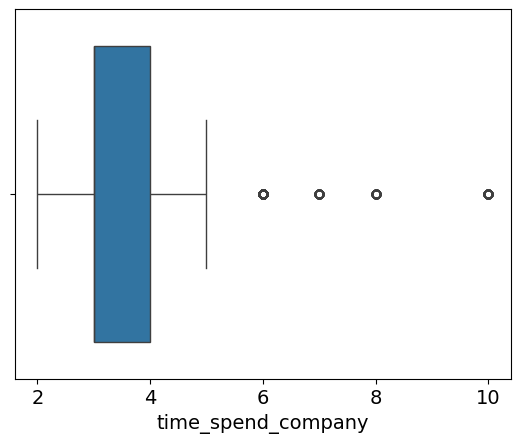

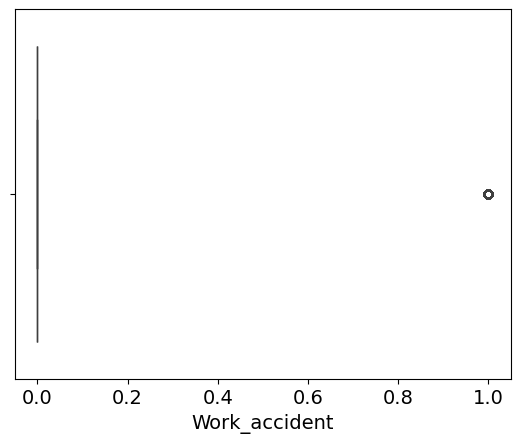

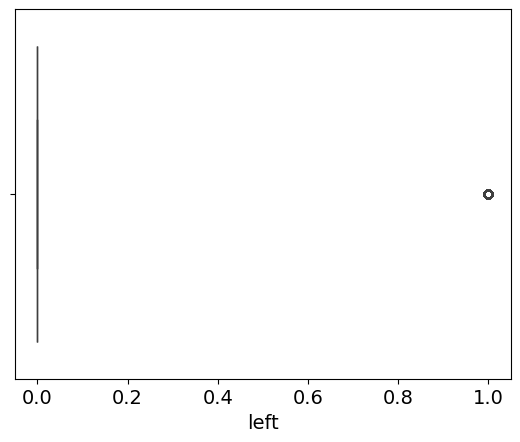

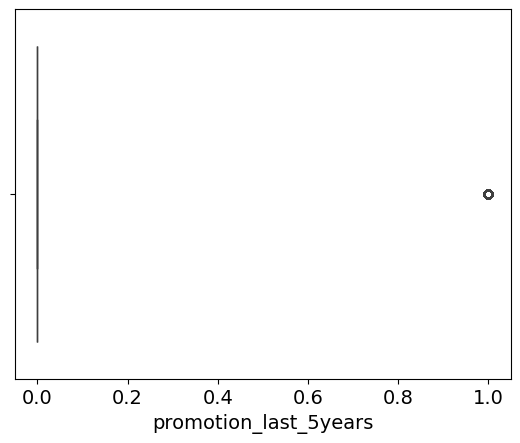

In [19]:
for col in num_col:
  sns.boxplot(x=df[col])
  plt.show()

<Axes: xlabel='time_spend_company', ylabel='Department'>

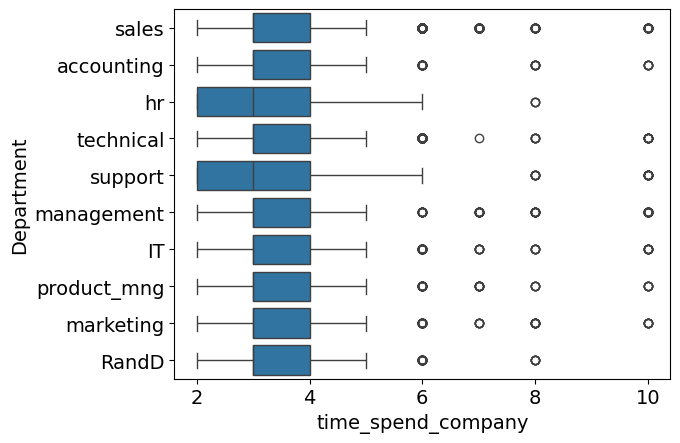

In [20]:
sns.boxplot(data=df,x='time_spend_company',y='Department')

In [22]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
df['Department']=le.fit_transform(df['Department'])

In [25]:
df['salary']=le.fit_transform(df['salary'])

In [26]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2


In [27]:
x=df.drop('left',axis=1)
y=df['left']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(x,y,train_size=0.20,random_state=42)

In [33]:
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)


(2398, 9)
(9593, 9)
(2398,)
(9593,)


In [34]:
scaler=StandardScaler()

In [35]:
X_TRAIN=scaler.fit_transform(X_TRAIN)

In [36]:
X_TEST=scaler.transform(X_TEST)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier